# Generate Custom Emedding

In this notebook we generate the final Embedding

In [1]:
import pandas as pd
import numpy as np
import os
import nltk.data
from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

from sklearn.neighbors import NearestNeighbors
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_colwidth', 250)

Using TensorFlow backend.


In [2]:
print (os.listdir('../Data/'))

['204kProducts.csv', 'Brands.csv', 'Categories.csv', 'Descriptions204k.csv', 'desktop.ini', 'FinalItems', 'Images', 'Images.csv', 'lemmatization-es.txt', 'stopwords_catalan.txt', 'Texto_PreProcesado.csv']


In [3]:
path = os.path.join('../Data/')
path_models = os.path.join('../Models/')

In [4]:
data = pd.read_csv(path + 'Texto_PreProcesado.csv', sep = ';', index_col = False)

In [5]:
data.head()

,item_id,brand,text
0,A28233506,Woman Limited El Corte Inglés,abrigo masculino textura mujer
1,A29054782,Woman Limited El Corte Inglés,abrigo doble faz mujer cinturon tono
2,A27354432,Woman El Corte Inglés,abrigo largo antelina mujer woman corte_ingles
3,A28302706,Lloyd's,chaqueta termica mujer efecto cortavientos
4,A27435502,Lloyd's,parka algodon mujer capucha


In [6]:
EMBEDDING_DIM = 100

In [7]:
data['text'] = data['text'].astype(str)
sentences = [word.split() for word in data['text'].values]
sentences[:3]

len(sentences)

204812

## Generate Word2Vec Embedding

In [ ]:
%%time
modelWV = Word2Vec(sentences, workers = 3, min_count=5, window = 10, size = EMBEDDING_DIM)
modelWV.train(sentences, total_examples=len(sentences), epochs=20)

In [ ]:
modelWV.save(path_models + "word2vec_model")

In [10]:
modelWV = Word2Vec.load(path_models + "word2vec_model")

### Let's test the Embedding

In [11]:
wl = 'bufanda'
modelWV.wv.most_similar (positive = wl)

[('estola', 0.631831169128418),
 ('invierno', 0.5619574189186096),
 ('corbata', 0.5533325672149658),
 ('panuelo', 0.5433658361434937),
 ('guante', 0.5428837537765503),
 ('boina', 0.5405052900314331),
 ('coletero', 0.5135939121246338),
 ('gorro', 0.5011366605758667),
 ('pajarita', 0.497850626707077),
 ('sombrero', 0.49148687720298767)]

In [12]:
def similar_products(text):
    list_text = text.split()
    most_similar = modelWV.wv.most_similar_cosmul(positive = list_text)
    
    return most_similar
    
similar_products('cable hdmi 1m')

[('vga', 0.4276890456676483),
 ('optix', 0.41249147057533264),
 ('ultrapanoramico', 0.3922581672668457),
 ('hubs', 0.38271114230155945),
 ('1920x1080', 0.379360556602478),
 ('n3060', 0.37646201252937317),
 ('retroiluminado', 0.37579819560050964),
 ('330s15', 0.37459027767181396),
 ('conexion', 0.37084850668907166),
 ('dvi', 0.36873140931129456)]

### Lets Study the impact of NumWords

In [33]:
vectorizer = CountVectorizer(tokenizer = word_tokenize)
transformed_data = vectorizer.fit_transform(data.text)
word_count= transformed_data.sum(axis = 0)

0.6967467938216259
0.8775108799981497
0.927650421515606
0.9787950859799323


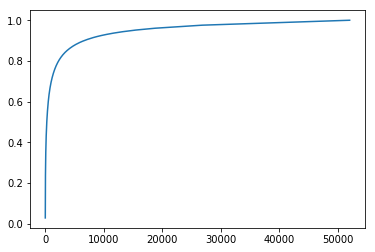

In [34]:
wc = np.array(word_count)[0]
idx = np.argsort(wc)[::-1]

percentages = np.zeros(len(wc))

for i, idx_ in enumerate(idx):
    percentages[i] = wc[idx_]

percentages_cumsum = percentages.cumsum()/percentages.sum()

plt.plot(percentages_cumsum)

print (percentages_cumsum[1000])
print (percentages_cumsum[5000])
print (percentages_cumsum[10000])
print (percentages_cumsum[30000])
